# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [99]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [100]:
df = pd.read_csv('craftcans.csv', na_values=['Does not apply'])

df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0


## How many rows do you have in the data? What are the column types?

In [101]:
shape = df.shape
shape


(2416, 7)

In [102]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [103]:
df.value_counts('Brewery').head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
dtype: int64

## What is the most common ABV? (alcohol by volume)

In [104]:
df.value_counts('ABV').head(1)

ABV
5.00%    215
dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [105]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [106]:
df.ABV = df.ABV.str.replace('%','')

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [107]:
df.ABV = df.ABV.astype(float)

df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [108]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

<AxesSubplot: >

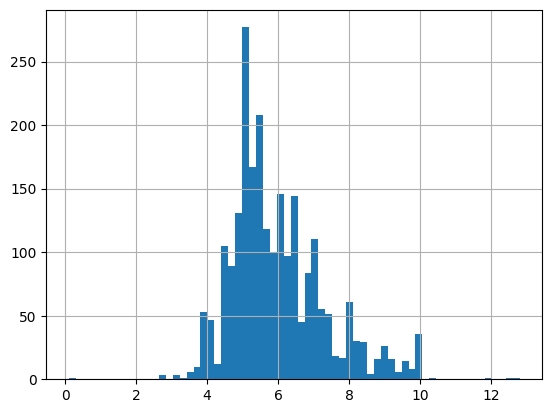

In [109]:
df.ABV.hist(bins=65)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [110]:
df[df.ABV.isnull()].shape

(68, 7)

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [111]:
df.value_counts('Location').head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
dtype: int64

## List all of the beer from Brooklyn, NY

In [112]:
df[df.Location == 'Brooklyn, NY'].Beer

115                              4Beans
210                              Jammer
246                             Abigale
404                       Nomader Weiss
421                                 Rad
439                        Molotov Lite
588                             Bengali
713                       Sensi Harvest
969                              Hi-Res
987               KelSo Nut Brown Lager
1057                      Global Warmer
1074                 Autumnation (2013)
1093               KelSo India Pale Ale
1267                          The Crisp
1268                       Sweet Action
1269                      Righteous Ale
1270                      Bengali Tiger
1305                      KelSo Pilsner
1365    Hipster Ale (Two Roads Brewing)
1366                        Bikini Beer
1373                East India Pale Ale
1624                             3Beans
1836                         Brownstone
1857                Brooklyn Summer Ale
1962    Hipster Ale (Westbrook Brewing)


## What brewery in Brooklyn puts out the most cans of beer?

In [113]:
df[df.Location == 'Brooklyn, NY'].Brewery.value_counts()


Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [114]:
df[df.Brewery == 'Sixpoint Craft Ales'].Style.value_counts().head(5)

American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [156]:
df[df.Location.str.contains(".*NY", na=False)].Brewery.value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Chatham Brewing                   2
Montauk Brewing Company           2
Bomb Beer Company                 2
Upstate Brewing Company           2
Newburgh Brewing Company          1
Southampton Publick House         1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: Brewery, dtype: int64

### Now *count* all of the breweries in New York state

In [116]:
df[df.Location.str.contains(".*NY", na=False)].Brewery.count()

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [117]:
df[df.Style.str.contains(".*IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [118]:
df.IBUs.mean()

42.71316725978647

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [120]:
# Removed the 'Does not apply' IBU values

df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot: >

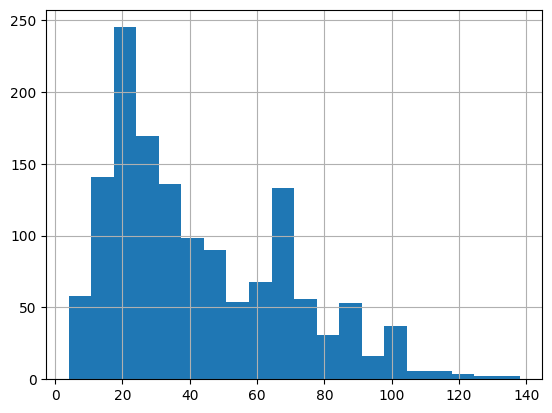

In [121]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [122]:
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [124]:
df[df.IBUs > 64.0].Beer

6                Citra Ass Down
7                London Balling
14                  Rico Sauvin
17                 Pile of Face
21                   Excess IPL
                 ...           
2408      Brew Free! or Die IPA
2410    Ten Fidy Imperial Stout
2412         GUBNA Imperial IPA
2414          Gordon Ale (2009)
2415            Dale's Pale Ale
Name: Beer, Length: 346, dtype: object

## List all of the beers with IBUs below the 25th percentile

In [125]:
df[df.IBUs < 21.0].Beer

2                          Wall's End
12                           Sho'nuff
13                        Bloody Show
18                     The Brown Note
19                        House Lager
                    ...              
2372                 Bombshell Blonde
2385              Bikini Blonde Lager
2396                 Royal Weisse Ale
2404                             Hell
2409    Hell or High Watermelon Wheat
Name: Beer, Length: 338, dtype: object

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [129]:
df.groupby('Style').IBUs.median().sort_values(ascending=False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

<AxesSubplot: >

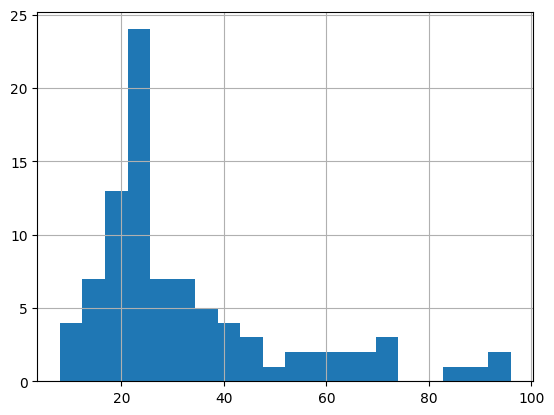

In [133]:
df.groupby('Style').IBUs.median().sort_values(ascending=False).hist(bins=20)

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [134]:
df[df.IBUs > 64.0].Style.value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [135]:
df[df.IBUs < 21.0].Style.value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [137]:
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Wheat Ale'])].IBUs.median()

15.0

## Draw a histogram of the IBUs of those beers

<AxesSubplot: >

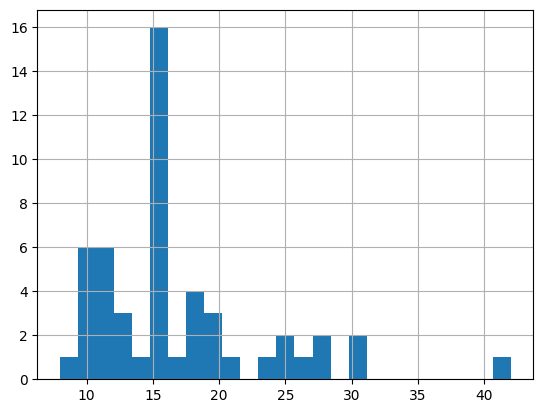

In [139]:
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Wheat Ale'])].IBUs.hist(bins=25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [150]:
df[df.Style.str.contains(".*IPA", na=False)].IBUs.median()

70.0

<AxesSubplot: >

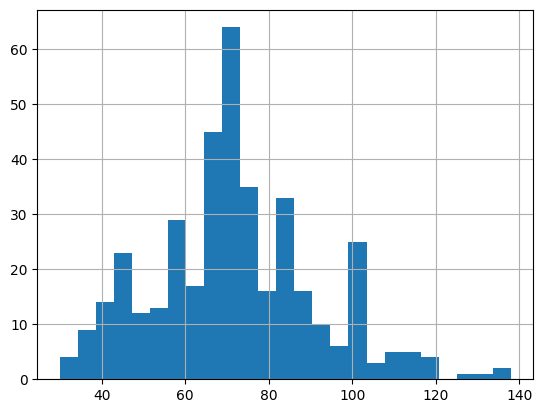

In [151]:
df[df.Style.str.contains(".*IPA", na=False)].IBUs.hist(bins=25)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

<AxesSubplot: >

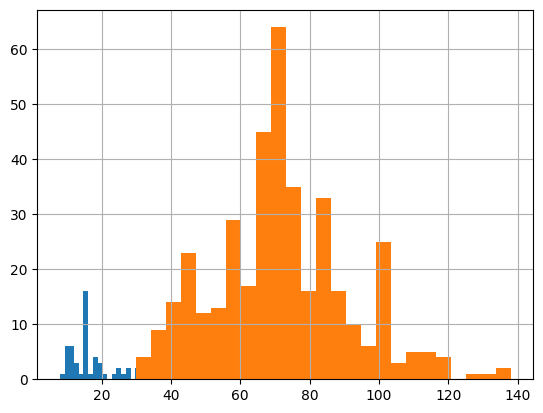

In [153]:
ax = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Wheat Ale'])].IBUs.hist(bins=25)

df[df.Style.str.contains(".*IPA", na=False)].IBUs.hist(ax=ax, bins=25)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

<AxesSubplot: >

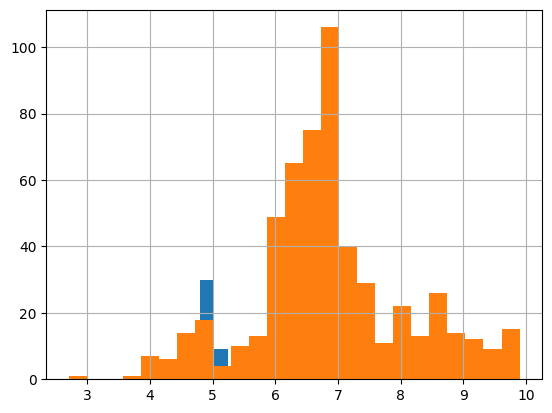

In [155]:
ax = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Wheat Ale'])].ABV.hist(bins=25)
df[df.Style.str.contains(".*IPA", na=False)].ABV.hist(ax=ax, bins=25)

## Good work!

If you made it this far you deserve a drink.